In [2]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from model import lorenz96_fdm
from assimilation import OI, ExtendedKF, EnKF, M3DVar

In [4]:
X_nature = np.load('./data/X_nature.npy')
X_ini = np.load('./data/X_ini.npy')
ts = np.load('./data/time_span.npy')
Pb = np.load('./data/Pb_assum.npy')
R = np.load('./data/R.npy')

In [5]:
dt = 0.01

In [6]:
def RMSE(forecast, nature):
    return np.sqrt(np.mean((forecast-nature)**2, axis=0))

# Assimilate normal observation

#### `rmse_tdv` as CNTL in the later experiments

In [7]:
# normal observation
X_obs = np.load('./data/obs_normal.npy')

In [8]:
tdv = M3DVar(lorenz96_fdm, dt)
tdv.list_params()
params = {
    'X_ini': X_ini,
    'obs': X_obs,
    'obs_interv': 8,
    'Pb': Pb,
    'R': R,
    'H_func': lambda arr: arr,
}
tdv.set_params(**params)
tdv.cycle()

0.9901124703727987


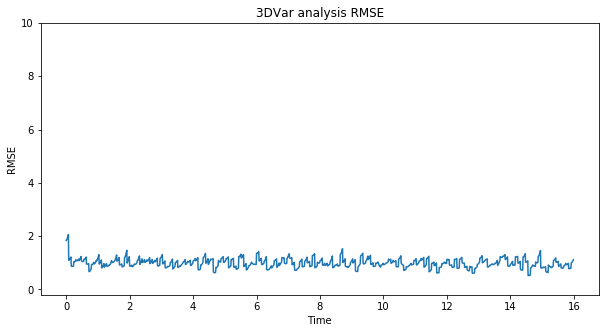

In [9]:
rmse_tdv = RMSE(tdv.analysis, X_nature)

plt.figure(figsize=(10, 5))
plt.plot(ts, rmse_tdv)
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.ylim([-0.2, 10])
plt.title('3DVar analysis RMSE')
print(rmse_tdv.mean())

# First moment

### Assimilate bias observations based on normality test

In [10]:
# first moment
ex_obs_dict = pickle.load(open('./data/obs_bias_005_040.pickle', 'rb'))
ex_obs_dict.keys()

dict_keys(['0.05', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40'])

obsm=0.05, Mean RMSE=0.9683, Variance RMSE=0.0390,  Without spinup: Mean RMSE=0.9577, Variance RMSE=0.0308
obsm=0.15, Mean RMSE=0.9858, Variance RMSE=0.0302,  Without spinup: Mean RMSE=0.9778, Variance RMSE=0.0223
obsm=0.20, Mean RMSE=0.9697, Variance RMSE=0.0274,  Without spinup: Mean RMSE=0.9612, Variance RMSE=0.0236
obsm=0.25, Mean RMSE=0.9902, Variance RMSE=0.0262,  Without spinup: Mean RMSE=0.9835, Variance RMSE=0.0227
obsm=0.30, Mean RMSE=1.0015, Variance RMSE=0.0276,  Without spinup: Mean RMSE=0.9953, Variance RMSE=0.0234
obsm=0.35, Mean RMSE=1.0014, Variance RMSE=0.0283,  Without spinup: Mean RMSE=0.9925, Variance RMSE=0.0217
obsm=0.40, Mean RMSE=1.0034, Variance RMSE=0.0302,  Without spinup: Mean RMSE=0.9969, Variance RMSE=0.0251


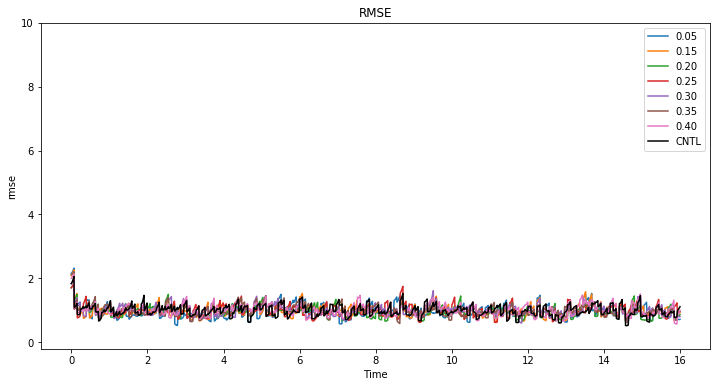

In [11]:
plt.figure(figsize=(12, 6))

mean_rmse = []        # mean RMSE
mean_rmse_nospn = []  # mean RMSE without spin up periods
var_rmse = []
var_rmse_nospn = []

for obsm in ex_obs_dict.keys():
    obs = ex_obs_dict[obsm]

    params = {
        'X_ini': X_ini,
        'obs': obs,
        'obs_interv': 8,
        'Pb': Pb,
        'R': R,
        'H_func': lambda arr: arr,
    }
    tdv = M3DVar(lorenz96_fdm, dt)
    tdv.set_params(**params)
    tdv.cycle()

    # calculate RMSE and stable index
    rmse = RMSE(tdv.analysis, X_nature)
    print(
        f'obsm={obsm}, Mean RMSE={rmse.mean():.4f}, Variance RMSE={rmse.var():.4f},  '
        + f'Without spinup: Mean RMSE={rmse[50:].mean():.4f}, Variance RMSE={rmse[50:].var():.4f}'
    )
    mean_rmse.append(rmse.mean())
    mean_rmse_nospn.append(rmse[50:].mean())
    var_rmse.append(rmse.var())
    var_rmse_nospn.append(rmse[50:].var())

    plt.plot(ts, rmse, label=obsm)
    
plt.plot(ts, rmse_tdv, 'k', label='CNTL')
plt.legend()
plt.title('RMSE')
plt.xlabel('Time')
plt.ylabel('rmse')
plt.ylim([-0.2, 10]);

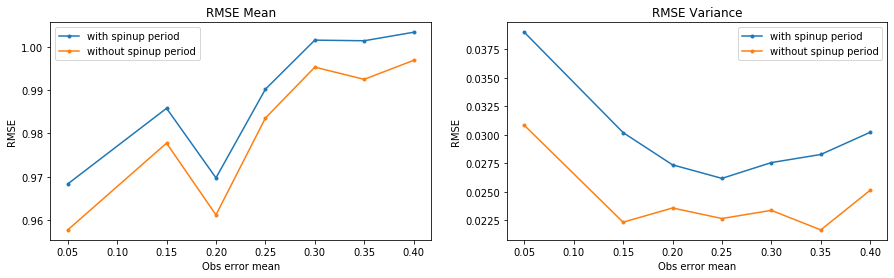

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))

ex_mean = list(map(lambda s: float(s), ex_obs_dict.keys()))
axs[0].plot(ex_mean, mean_rmse, '.-', label='with spinup period')
axs[0].plot(ex_mean, mean_rmse_nospn, '.-', label='without spinup period')
axs[0].legend()
axs[0].set_title('RMSE Mean')
axs[0].set_xlabel('Obs error mean')
axs[0].set_ylabel('RMSE')

axs[1].plot(ex_mean, var_rmse, '.-', label='with spinup period')
axs[1].plot(ex_mean, var_rmse_nospn, '.-', label='without spinup period')
axs[1].legend()
axs[1].set_title('RMSE Variance')
axs[1].set_xlabel('Obs error mean')
axs[1].set_ylabel('RMSE');

### Assimilate more extreme bias observations

In [13]:
ex_obs_dict = pickle.load(open('./data/obs_bias_020_520.pickle', 'rb'))

obsm=0.20, Mean RMSE=0.9894, Variance RMSE=0.0286,  Without spinup: Mean RMSE=0.9806, Variance RMSE=0.0221
obsm=0.45, Mean RMSE=1.0103, Variance RMSE=0.0314,  Without spinup: Mean RMSE=1.0029, Variance RMSE=0.0271
obsm=0.70, Mean RMSE=1.0704, Variance RMSE=0.0290,  Without spinup: Mean RMSE=1.0682, Variance RMSE=0.0271
obsm=0.95, Mean RMSE=1.1554, Variance RMSE=0.0220,  Without spinup: Mean RMSE=1.1537, Variance RMSE=0.0195
obsm=1.20, Mean RMSE=1.2692, Variance RMSE=0.0281,  Without spinup: Mean RMSE=1.2714, Variance RMSE=0.0271
obsm=1.45, Mean RMSE=1.4471, Variance RMSE=0.0231,  Without spinup: Mean RMSE=1.4492, Variance RMSE=0.0217
obsm=1.70, Mean RMSE=1.5555, Variance RMSE=0.0279,  Without spinup: Mean RMSE=1.5539, Variance RMSE=0.0265
obsm=1.95, Mean RMSE=1.6945, Variance RMSE=0.0299,  Without spinup: Mean RMSE=1.6952, Variance RMSE=0.0289
obsm=2.20, Mean RMSE=1.8872, Variance RMSE=0.0268,  Without spinup: Mean RMSE=1.8897, Variance RMSE=0.0262
obsm=2.45, Mean RMSE=2.0606, Variance

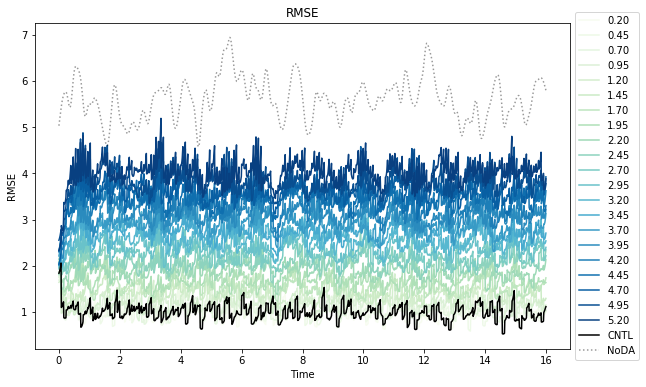

In [14]:
import matplotlib.cm as cm


mean_rmse = []        # mean RMSE
mean_rmse_nospn = []  # mean RMSE without spin up periods
var_rmse = []
var_rmse_nospn = []

plt.figure(figsize=(12, 6))
colors = cm.GnBu(np.linspace(0, 1, len(ex_obs_dict.keys())))

for obsm, color in zip(ex_obs_dict.keys(), colors):
    obs = ex_obs_dict[obsm]

    params = {
        'X_ini': X_ini, 
        'obs': obs, 
        'obs_interv': 8,
        'Pb': Pb,
        'R': R, 
        'H_func': lambda arr: arr,
    }

    tdv = M3DVar(lorenz96_fdm, dt)
    tdv.set_params(**params)
    tdv.cycle()

    # calculate RMSE and stable index
    rmse = RMSE(tdv.analysis, X_nature)
    print(
        f'obsm={obsm}, Mean RMSE={rmse.mean():.4f}, Variance RMSE={rmse.var():.4f},  '
        + f'Without spinup: Mean RMSE={rmse[50:].mean():.4f}, Variance RMSE={rmse[50:].var():.4f}'
    )
    mean_rmse.append(rmse.mean())
    mean_rmse_nospn.append(rmse[50:].mean())
    var_rmse.append(rmse.var())
    var_rmse_nospn.append(rmse[50:].var())
    
    plt.plot(ts, rmse, color=color, label=obsm)
    
# CNTL
plt.plot(ts, rmse_tdv, color='k', label='CNTL')

# no DA
forecast = lorenz96_fdm(X_ini, ts)
rmse_noda = RMSE(forecast, X_nature)
plt.plot(ts, rmse_noda, label='NoDA', color='k', ls='dotted', alpha=0.4)

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('RMSE')
plt.xlabel('Time')
plt.ylabel('RMSE');

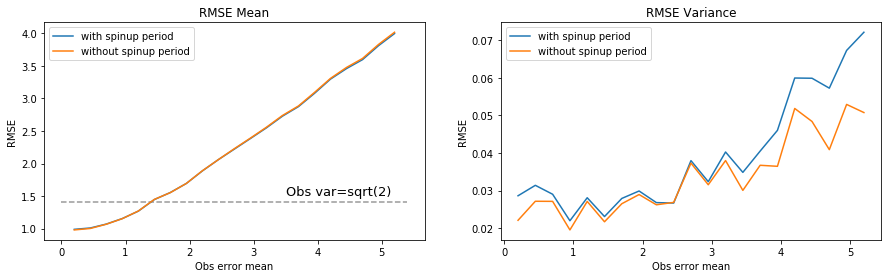

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))

ex_mean = list(map(lambda s: float(s), ex_obs_dict.keys()))
axs[0].plot(ex_mean, mean_rmse, label='with spinup period')
axs[0].plot(ex_mean, mean_rmse_nospn, label='without spinup period')
axs[0].legend()
axs[0].set_title('RMSE Mean')
axs[0].set_xlabel('Obs error mean')
axs[0].set_ylabel('RMSE')
axs[0].hlines(y=np.sqrt(2), xmin=0, xmax=5.4, ls='dashed', alpha=0.4)
axs[0].text(3.5, np.sqrt(2)+0.1, 'Obs var=sqrt(2)', fontsize=13)

axs[1].plot(ex_mean, var_rmse, label='with spinup period')
axs[1].plot(ex_mean, var_rmse_nospn, label='without spinup period')
axs[1].legend()
axs[1].set_title('RMSE Variance')
axs[1].set_xlabel('Obs error mean')
axs[1].set_ylabel('RMSE');

# Third moment

### Assimilate skew observation based on normality test

In [16]:
ex_obs_dict = pickle.load(open('./data/obs_skew_015_135.pickle', 'rb'))
ex_obs_dict.keys()

dict_keys(['0.15', '0.45', '0.75', '1.05', '1.35'])

alpha=0.15, Mean RMSE=0.9914, Variance RMSE=0.0225,  Without spinup: Mean RMSE=0.9875, Variance RMSE=0.0171
alpha=0.45, Mean RMSE=0.9902, Variance RMSE=0.0238,  Without spinup: Mean RMSE=0.9816, Variance RMSE=0.0152
alpha=0.75, Mean RMSE=0.9782, Variance RMSE=0.0228,  Without spinup: Mean RMSE=0.9699, Variance RMSE=0.0153
alpha=1.05, Mean RMSE=0.9785, Variance RMSE=0.0204,  Without spinup: Mean RMSE=0.9708, Variance RMSE=0.0156
alpha=1.35, Mean RMSE=0.9845, Variance RMSE=0.0234,  Without spinup: Mean RMSE=0.9789, Variance RMSE=0.0178


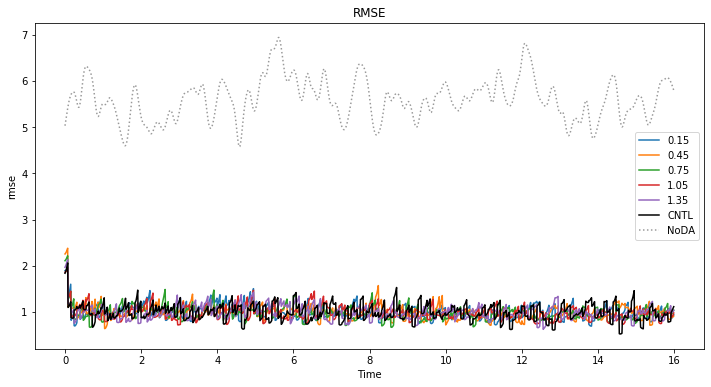

In [17]:
mean_rmse = []        # mean RMSE
mean_rmse_nospn = []  # mean RMSE without spin up periods
var_rmse = []
var_rmse_nospn = []

plt.figure(figsize=(12, 6))

for ex_a in ex_obs_dict.keys():
    obs = ex_obs_dict[ex_a]
    
    params = {
        'X_ini': X_ini, 
        'obs': obs, 
        'obs_interv': 8, 
        'Pb': Pb,
        'R': R, 
        'H_func': lambda arr: arr,
    }

    tdv = M3DVar(lorenz96_fdm, dt)
    tdv.set_params(**params)
    tdv.cycle()

    # calculate RMSE and stable index
    rmse = RMSE(tdv.analysis, X_nature)
    print(
        f'alpha={ex_a}, Mean RMSE={rmse.mean():.4f}, Variance RMSE={rmse.var():.4f},  '
        + f'Without spinup: Mean RMSE={rmse[50:].mean():.4f}, Variance RMSE={rmse[50:].var():.4f}'
    )
    mean_rmse.append(rmse.mean())
    mean_rmse_nospn.append(rmse[50:].mean())
    var_rmse.append(rmse.var())
    var_rmse_nospn.append(rmse[50:].var())

    plt.plot(ts, rmse, label=ex_a)
    
# CNTL
plt.plot(ts, rmse_tdv, color='k', label='CNTL')
    
# no DA
forecast = lorenz96_fdm(X_ini, ts)
rmse_noda = RMSE(forecast, X_nature)
plt.plot(ts, rmse_noda, label='NoDA', color='k', ls='dotted', alpha=0.4)
    
plt.legend()
plt.title('RMSE')
plt.xlabel('Time')
plt.ylabel('rmse');

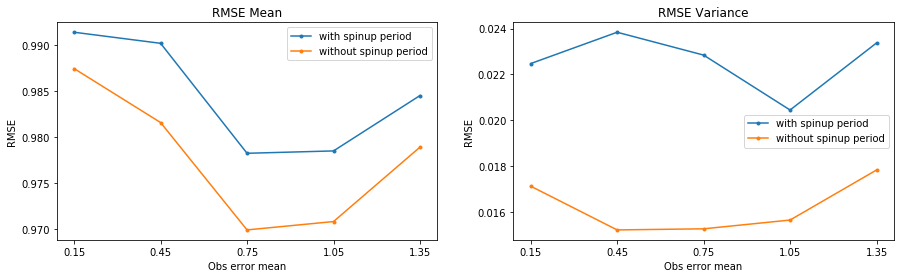

In [18]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))

ex_alpha = list(map(lambda s: float(s), ex_obs_dict.keys()))
axs[0].plot(ex_alpha, mean_rmse, '.-', label='with spinup period')
axs[0].plot(ex_alpha, mean_rmse_nospn, '.-', label='without spinup period')
axs[0].legend()
axs[0].set_title('RMSE Mean')
axs[0].set_xticks(ex_alpha)
axs[0].set_xlabel('Obs error mean')
axs[0].set_ylabel('RMSE')

axs[1].plot(ex_alpha, var_rmse, '.-', label='with spinup period')
axs[1].plot(ex_alpha, var_rmse_nospn, '.-', label='without spinup period')
axs[1].legend()
axs[1].set_title('RMSE Variance')
axs[1].set_xticks(ex_alpha)
axs[1].set_xlabel('Obs error mean')
axs[1].set_ylabel('RMSE');

### Assimilate more extreme skewness

In [19]:
ex_obs_dict = pickle.load(open('./data/obs_skew_130_330.pickle', 'rb'))
ex_obs_dict.keys()

dict_keys(['1.30', '1.55', '1.80', '2.05', '2.30', '2.55', '2.80', '3.05', '3.30'])

alpha=1.30, Mean RMSE=0.9759, Variance RMSE=0.0236,  Without spinup: Mean RMSE=0.9664, Variance RMSE=0.0153
alpha=1.55, Mean RMSE=0.9792, Variance RMSE=0.0213,  Without spinup: Mean RMSE=0.9707, Variance RMSE=0.0153
alpha=1.80, Mean RMSE=0.9785, Variance RMSE=0.0212,  Without spinup: Mean RMSE=0.9728, Variance RMSE=0.0143
alpha=2.05, Mean RMSE=0.9816, Variance RMSE=0.0212,  Without spinup: Mean RMSE=0.9750, Variance RMSE=0.0167
alpha=2.30, Mean RMSE=0.9647, Variance RMSE=0.0190,  Without spinup: Mean RMSE=0.9594, Variance RMSE=0.0139
alpha=2.55, Mean RMSE=0.9785, Variance RMSE=0.0239,  Without spinup: Mean RMSE=0.9731, Variance RMSE=0.0181
alpha=2.80, Mean RMSE=0.9730, Variance RMSE=0.0206,  Without spinup: Mean RMSE=0.9665, Variance RMSE=0.0163
alpha=3.05, Mean RMSE=0.9958, Variance RMSE=0.0290,  Without spinup: Mean RMSE=0.9869, Variance RMSE=0.0192
alpha=3.30, Mean RMSE=0.9898, Variance RMSE=0.0338,  Without spinup: Mean RMSE=0.9764, Variance RMSE=0.0210


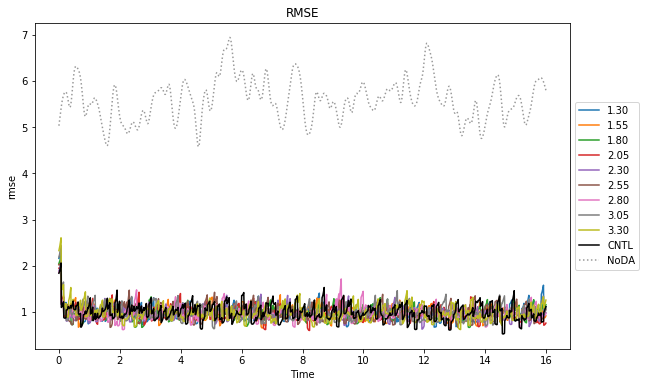

In [20]:
mean_rmse = []        # mean RMSE
mean_rmse_nospn = []  # mean RMSE without spin up periods
var_rmse = []
var_rmse_nospn = []

plt.figure(figsize=(12, 6))

for ex_a in ex_obs_dict.keys():
    obs = ex_obs_dict[ex_a]
    
    params = {
        'X_ini': X_ini, 
        'obs': obs, 
        'obs_interv': 8, 
        'Pb': Pb,
        'R': R, 
        'H_func': lambda arr: arr,
    }

    tdv = M3DVar(lorenz96_fdm, dt)
    tdv.set_params(**params)
    tdv.cycle()

    # calculate RMSE and stable index
    rmse = RMSE(tdv.analysis, X_nature)
    print(
        f'alpha={ex_a}, Mean RMSE={rmse.mean():.4f}, Variance RMSE={rmse.var():.4f},  '
        + f'Without spinup: Mean RMSE={rmse[50:].mean():.4f}, Variance RMSE={rmse[50:].var():.4f}'
    )
    mean_rmse.append(rmse.mean())
    mean_rmse_nospn.append(rmse[50:].mean())
    var_rmse.append(rmse.var())
    var_rmse_nospn.append(rmse[50:].var())

    plt.plot(ts, rmse, label=ex_a)
    
# CNTL
plt.plot(ts, rmse_tdv, color='k', label='CNTL')
    
# no DA
forecast = lorenz96_fdm(X_ini, ts)
rmse_noda = RMSE(forecast, X_nature)
plt.plot(ts, rmse_noda, label='NoDA', color='k', ls='dotted', alpha=0.4)
    
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('RMSE')
plt.xlabel('Time')
plt.ylabel('rmse');

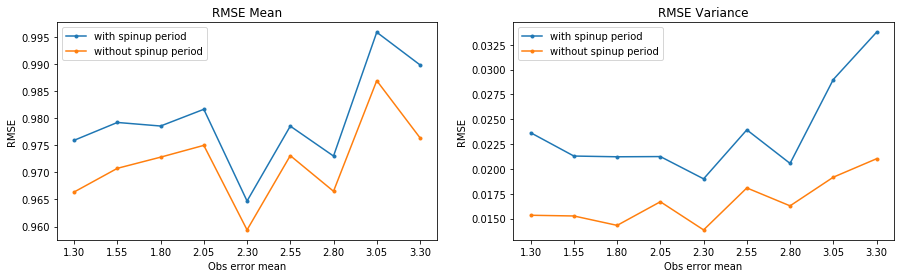

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))

ex_alpha = list(map(lambda s: float(s), ex_obs_dict.keys()))
axs[0].plot(ex_alpha, mean_rmse, '.-', label='with spinup period')
axs[0].plot(ex_alpha, mean_rmse_nospn, '.-', label='without spinup period')
axs[0].legend()
axs[0].set_title('RMSE Mean')
axs[0].set_xticks(ex_alpha)
axs[0].set_xlabel('Obs error mean')
axs[0].set_ylabel('RMSE')

axs[1].plot(ex_alpha, var_rmse, '.-', label='with spinup period')
axs[1].plot(ex_alpha, var_rmse_nospn, '.-', label='without spinup period')
axs[1].legend()
axs[1].set_title('RMSE Variance')
axs[1].set_xticks(ex_alpha)
axs[1].set_xlabel('Obs error mean')
axs[1].set_ylabel('RMSE');

### Repeated assimilate skew observation based on normality test (repeat 10 times)

In [22]:
ex_obs_dict = pickle.load(open('./data/obs_skew_015_135.pickle', 'rb'))
ex_alpha = ex_obs_dict.keys()
ex_alpha = list(map(float, ex_alpha))
ex_alpha

[0.15, 0.45, 0.75, 1.05, 1.35]

In [23]:
from gen_skew_func import gen_skew_obs

rmse_dict = {}
for ex_a in ex_alpha:
    print(ex_a)
    rmse = np.zeros_like(ts)
    
    for _ in range(10):
        obs = gen_skew_obs(mean=0, var=2, alpha=ex_a, obs_intv=8)
        
        params = {
            'X_ini': X_ini, 
            'obs': obs, 
            'obs_interv': 8, 
            'Pb': Pb,
            'R': R, 
            'H_func': lambda arr: arr,
        }

        tdv = M3DVar(lorenz96_fdm, dt)
        tdv.set_params(**params)
        tdv.cycle()
        rmse += RMSE(tdv.analysis, X_nature)

    rmse /= 10
    key = f'{ex_a:.2f}'
    rmse_dict[key] = rmse

0.15
0.45
0.75
1.05
1.35


alpha = 0.15, mean RMSE = 0.9862
alpha = 0.45, mean RMSE = 0.9818
alpha = 0.75, mean RMSE = 0.9837
alpha = 1.05, mean RMSE = 0.9810
alpha = 1.35, mean RMSE = 0.9857


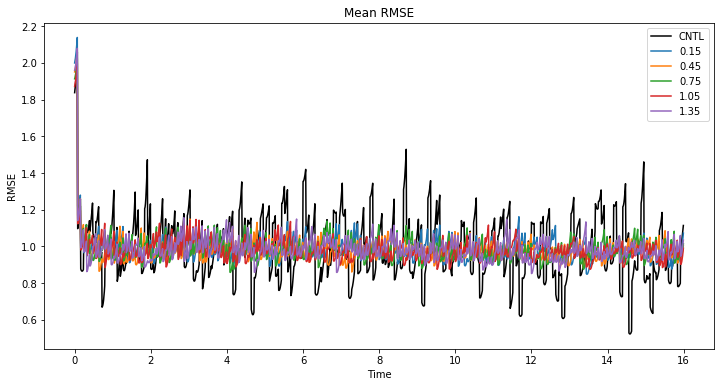

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(ts, rmse_tdv, 'k', label='CNTL')

for key, rmse in rmse_dict.items():
    print(f'alpha = {key}, mean RMSE = {rmse.mean():.4f}')
    plt.plot(ts, rmse, label=key)

plt.legend()
plt.title('Mean RMSE')
plt.xlabel('Time')
plt.ylabel('RMSE');

### Repeated assimilate skew observations for more extreme alpha (repeat 10 times)

In [25]:
ex_obs_dict = pickle.load(open('./data/obs_skew_130_330.pickle', 'rb'))
ex_alpha = ex_obs_dict.keys()
ex_alpha = list(map(float, ex_alpha))
ex_alpha

[1.3, 1.55, 1.8, 2.05, 2.3, 2.55, 2.8, 3.05, 3.3]

In [26]:
from gen_skew_func import gen_skew_obs

rmse_dict = {}
for ex_a in ex_alpha:
    print(ex_a)
    rmse = np.zeros_like(ts)
    
    for _ in range(10):
        obs = gen_skew_obs(mean=0, var=2, alpha=ex_a, obs_intv=8)
        
        params = {
            'X_ini': X_ini, 
            'obs': obs, 
            'obs_interv': 8, 
            'Pb': Pb,
            'R': R, 
            'H_func': lambda arr: arr,
        }

        tdv = M3DVar(lorenz96_fdm, dt)
        tdv.set_params(**params)
        tdv.cycle()
        rmse += RMSE(tdv.analysis, X_nature)

    rmse /= 10
    key = f'{ex_a:.2f}'
    rmse_dict[key] = rmse

1.3
1.55
1.8
2.05
2.3
2.55
2.8
3.05
3.3


alpha = 1.30, mean RMSE = 0.9847
alpha = 1.55, mean RMSE = 0.9891
alpha = 1.80, mean RMSE = 0.9871
alpha = 2.05, mean RMSE = 0.9895
alpha = 2.30, mean RMSE = 0.9859
alpha = 2.55, mean RMSE = 0.9815
alpha = 2.80, mean RMSE = 0.9806
alpha = 3.05, mean RMSE = 0.9835
alpha = 3.30, mean RMSE = 0.9744


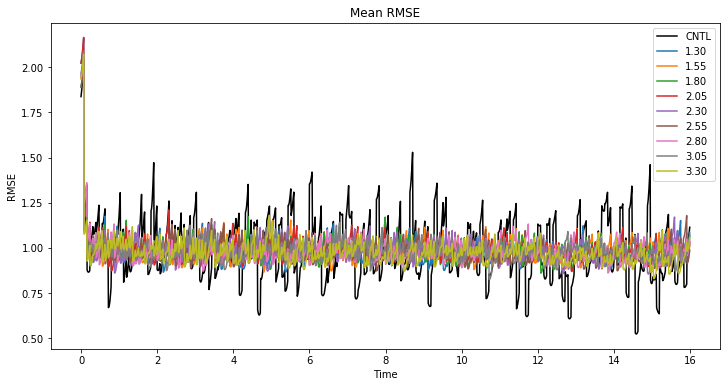

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(ts, rmse_tdv, 'k', label='CNTL')

for key, rmse in rmse_dict.items():
    print(f'alpha = {key}, mean RMSE = {rmse.mean():.4f}')
    plt.plot(ts, rmse, label=key)

plt.legend()
plt.title('Mean RMSE')
plt.xlabel('Time')
plt.ylabel('RMSE');

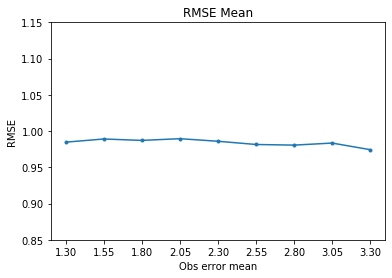

In [30]:
mean_rmse = []
for key, rmse in rmse_dict.items():
    mean_rmse.append(rmse.mean())


plt.plot(ex_alpha, mean_rmse, '.-')
plt.title('RMSE Mean')
plt.xticks(ex_alpha)
plt.xlabel('Obs error mean')
plt.ylabel('RMSE')
plt.ylim([0.85, 1.15]);

### Check the ratio of skew observation located between -2*std ~ 2*std

In [31]:
ex_obs_dict = pickle.load(open('./data/obs_skew_130_330.pickle', 'rb'))
ex_obs_dict.keys()

dict_keys(['1.30', '1.55', '1.80', '2.05', '2.30', '2.55', '2.80', '3.05', '3.30'])

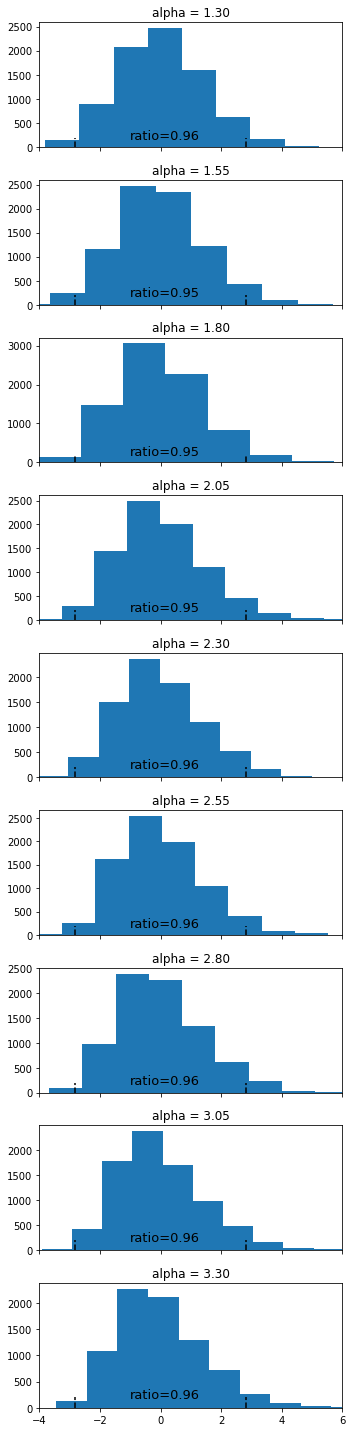

In [32]:
nrows = len(ex_obs_dict.keys())
fig, axs = plt.subplots(nrows=nrows, figsize=(5, 20), sharex=True)

for i, (key, obs) in enumerate(ex_obs_dict.items()):
    obserr = (obs - X_nature[:,::8]).ravel()
    axs[i].hist(obserr)
    
    std = np.sqrt(2)
    axs[i].vlines([2*std, -2*std], ymin=0, ymax=200, ls='dashed')
    axs[i].set_xlim([-4, 6])
    axs[i].set_title(f'alpha = {key}')
    
    total_size = obserr.size
    within_size = obserr[np.where((obserr <= 2*std) & (obserr >= -2*std))].size
    ratio = within_size / total_size
    axs[i].text(-1, 175, f'ratio={ratio:.2f}', fontsize=13)

plt.tight_layout()

# Fourth moment

### Assimilate kurtosis observation based on normality test

In [33]:
ex_obs_dict = pickle.load(open('./data/obs_kurtosis_050_220.pickle', 'rb'))
ex_obs_dict.keys()

dict_keys(['0.5', '0.6', '0.7', '0.8', '0.9', '1.2', '1.6', '1.8', '2.0', '2.2'])

delta=0.5, Mean RMSE=0.9646, Variance RMSE=0.0433,  Without spinup: Mean RMSE=0.9562, Variance RMSE=0.0381
delta=0.6, Mean RMSE=0.9940, Variance RMSE=0.0339,  Without spinup: Mean RMSE=0.9899, Variance RMSE=0.0288
delta=0.7, Mean RMSE=0.9796, Variance RMSE=0.0321,  Without spinup: Mean RMSE=0.9710, Variance RMSE=0.0242
delta=0.8, Mean RMSE=0.9988, Variance RMSE=0.0224,  Without spinup: Mean RMSE=0.9936, Variance RMSE=0.0164
delta=0.9, Mean RMSE=0.9720, Variance RMSE=0.0238,  Without spinup: Mean RMSE=0.9626, Variance RMSE=0.0167
delta=1.2, Mean RMSE=0.9715, Variance RMSE=0.0186,  Without spinup: Mean RMSE=0.9657, Variance RMSE=0.0132
delta=1.6, Mean RMSE=0.9785, Variance RMSE=0.0233,  Without spinup: Mean RMSE=0.9664, Variance RMSE=0.0127
delta=1.8, Mean RMSE=0.9823, Variance RMSE=0.0218,  Without spinup: Mean RMSE=0.9767, Variance RMSE=0.0164
delta=2.0, Mean RMSE=0.9834, Variance RMSE=0.0165,  Without spinup: Mean RMSE=0.9781, Variance RMSE=0.0122
delta=2.2, Mean RMSE=0.9870, Variance

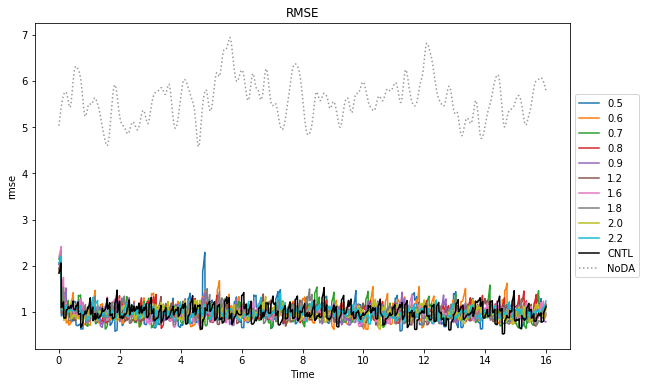

In [34]:
mean_rmse = []        # mean RMSE
mean_rmse_nospn = []  # mean RMSE without spin up periods
var_rmse = []
var_rmse_nospn = []

plt.figure(figsize=(12, 6))

for ex_d in ex_obs_dict.keys():
    obs = ex_obs_dict[ex_d]
    
    params = {
        'X_ini': X_ini, 
        'obs': obs, 
        'obs_interv': 8, 
        'Pb': Pb,
        'R': R, 
        'H_func': lambda arr: arr,
    }

    tdv = M3DVar(lorenz96_fdm, dt)
    tdv.set_params(**params)
    tdv.cycle()

    # calculate RMSE and stable index
    rmse = RMSE(tdv.analysis, X_nature)
    print(
        f'delta={ex_d}, Mean RMSE={rmse.mean():.4f}, Variance RMSE={rmse.var():.4f},  '
        + f'Without spinup: Mean RMSE={rmse[50:].mean():.4f}, Variance RMSE={rmse[50:].var():.4f}'
    )
    mean_rmse.append(rmse.mean())
    mean_rmse_nospn.append(rmse[50:].mean())
    var_rmse.append(rmse.var())
    var_rmse_nospn.append(rmse[50:].var())

    plt.plot(ts, rmse, label=ex_d)
    
# CNTL
plt.plot(ts, rmse_tdv, color='k', label='CNTL')
    
# no DA
forecast = lorenz96_fdm(X_ini, ts)
rmse_noda = RMSE(forecast, X_nature)
plt.plot(ts, rmse_noda, label='NoDA', color='k', ls='dotted', alpha=0.4)
    
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('RMSE')
plt.xlabel('Time')
plt.ylabel('rmse');

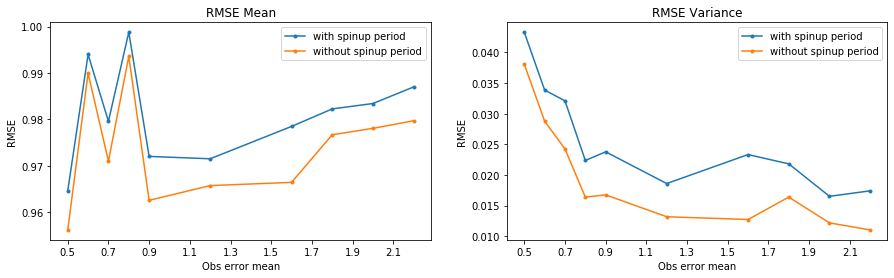

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))

ex_delta = list(map(lambda s: float(s), ex_obs_dict.keys()))
xticks = np.arange(min(ex_delta), max(ex_delta), 0.2)

axs[0].plot(ex_delta, mean_rmse, '.-', label='with spinup period')
axs[0].plot(ex_delta, mean_rmse_nospn, '.-', label='without spinup period')
axs[0].legend()
axs[0].set_title('RMSE Mean')
axs[0].set_xticks(xticks)
axs[0].set_xlabel('Obs error mean')
axs[0].set_ylabel('RMSE')

axs[1].plot(ex_delta, var_rmse, '.-', label='with spinup period')
axs[1].plot(ex_delta, var_rmse_nospn, '.-', label='without spinup period')
axs[1].legend()
axs[1].set_title('RMSE Variance')
axs[1].set_xticks(xticks)
axs[1].set_xlabel('Obs error mean')
axs[1].set_ylabel('RMSE');

(-20, 20)

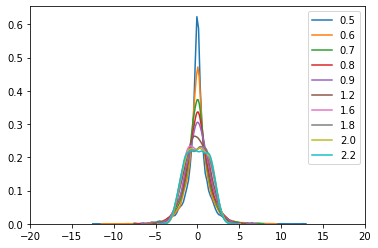

In [36]:
import seaborn as sns

fig, ax = plt.subplots()

for key in ex_obs_dict.keys():
    obs = ex_obs_dict[key]
    obserr = obs - X_nature[:,::8]
    obserr = obserr.ravel()
    sns.kdeplot(obserr, label=key, ax=ax)
plt.xlim([-20, 20])

### Assimilate kurtosis observation with more extreme delta

In [37]:
ex_obs_dict = pickle.load(open('./data/obs_kurtosis_010_340.pickle', 'rb'))
ex_obs_dict.keys()

dict_keys(['0.1', '0.2', '0.3', '0.4', '2.5', '2.8', '3.1', '3.4'])

delta=0.1, Mean RMSE=0.4395, Variance RMSE=0.5385,  Without spinup: Mean RMSE=0.4091, Variance RMSE=0.4790
delta=0.2, Mean RMSE=0.8941, Variance RMSE=0.3680,  Without spinup: Mean RMSE=0.8882, Variance RMSE=0.3632
delta=0.3, Mean RMSE=0.8452, Variance RMSE=0.0925,  Without spinup: Mean RMSE=0.8346, Variance RMSE=0.0823
delta=0.4, Mean RMSE=0.9473, Variance RMSE=0.0601,  Without spinup: Mean RMSE=0.9424, Variance RMSE=0.0562
delta=2.5, Mean RMSE=0.9804, Variance RMSE=0.0193,  Without spinup: Mean RMSE=0.9725, Variance RMSE=0.0129
delta=2.8, Mean RMSE=0.9854, Variance RMSE=0.0177,  Without spinup: Mean RMSE=0.9778, Variance RMSE=0.0116
delta=3.1, Mean RMSE=0.9921, Variance RMSE=0.0146,  Without spinup: Mean RMSE=0.9850, Variance RMSE=0.0095
delta=3.4, Mean RMSE=0.9903, Variance RMSE=0.0153,  Without spinup: Mean RMSE=0.9844, Variance RMSE=0.0122


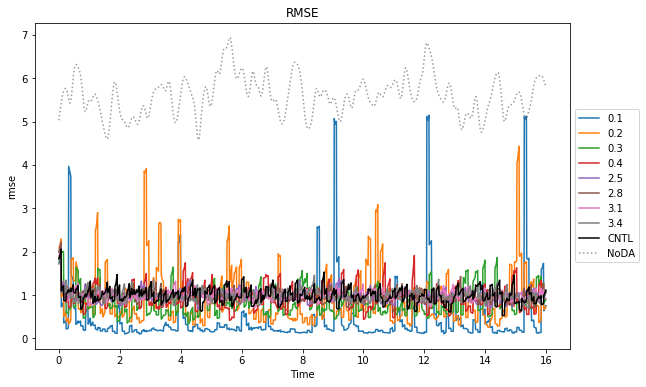

In [38]:
mean_rmse = []        # mean RMSE
mean_rmse_nospn = []  # mean RMSE without spin up periods
var_rmse = []
var_rmse_nospn = []

plt.figure(figsize=(12, 6))

for ex_d in ex_obs_dict.keys():
    obs = ex_obs_dict[ex_d]
    
    params = {
        'X_ini': X_ini, 
        'obs': obs, 
        'obs_interv': 8, 
        'Pb': Pb,
        'R': R, 
        'H_func': lambda arr: arr,
    }

    tdv = M3DVar(lorenz96_fdm, dt)
    tdv.set_params(**params)
    tdv.cycle()

    # calculate RMSE and stable index
    rmse = RMSE(tdv.analysis, X_nature)
    print(
        f'delta={ex_d}, Mean RMSE={rmse.mean():.4f}, Variance RMSE={rmse.var():.4f},  '
        + f'Without spinup: Mean RMSE={rmse[50:].mean():.4f}, Variance RMSE={rmse[50:].var():.4f}'
    )
    mean_rmse.append(rmse.mean())
    mean_rmse_nospn.append(rmse[50:].mean())
    var_rmse.append(rmse.var())
    var_rmse_nospn.append(rmse[50:].var())

    plt.plot(ts, rmse, label=ex_d)
    
# CNTL
plt.plot(ts, rmse_tdv, color='k', label='CNTL')
    
# no DA
forecast = lorenz96_fdm(X_ini, ts)
rmse_noda = RMSE(forecast, X_nature)
plt.plot(ts, rmse_noda, label='NoDA', color='k', ls='dotted', alpha=0.4)
    
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('RMSE')
plt.xlabel('Time')
plt.ylabel('rmse');

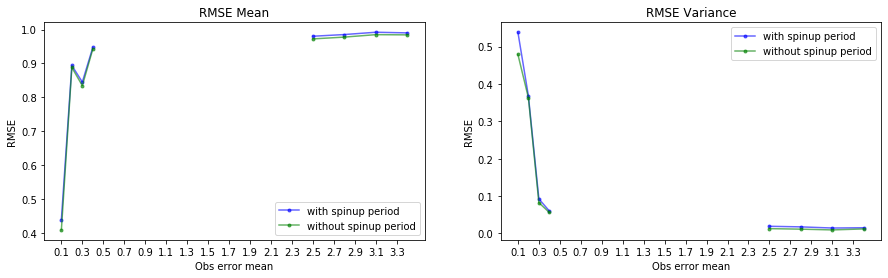

In [39]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))

ex_delta = list(map(lambda s: float(s), ex_obs_dict.keys()))
xticks = np.arange(min(ex_delta), max(ex_delta), 0.2)

axs[0].plot(ex_delta[:4], mean_rmse[:4], 'b.-', alpha=0.6, label='with spinup period')
axs[0].plot(ex_delta[4:], mean_rmse[4:], 'b.-', alpha=0.6)
axs[0].plot(ex_delta[:4], mean_rmse_nospn[:4], 'g.-', alpha=0.6, label='without spinup period')
axs[0].plot(ex_delta[4:], mean_rmse_nospn[4:], 'g.-', alpha=0.6)
axs[0].legend()
axs[0].set_title('RMSE Mean')
axs[0].set_xticks(xticks)
axs[0].set_xlabel('Obs error mean')
axs[0].set_ylabel('RMSE')

axs[1].plot(ex_delta[:4], var_rmse[:4], 'b.-', alpha=0.6, label='with spinup period')
axs[1].plot(ex_delta[4:], var_rmse[4:], 'b.-', alpha=0.6)
axs[1].plot(ex_delta[:4], var_rmse_nospn[:4], 'g.-', alpha=0.6, label='without spinup period')
axs[1].plot(ex_delta[4:], var_rmse_nospn[4:], 'g.-', alpha=0.6)
axs[1].legend()
axs[1].set_title('RMSE Variance')
axs[1].set_xticks(xticks)
axs[1].set_xlabel('Obs error mean')
axs[1].set_ylabel('RMSE');

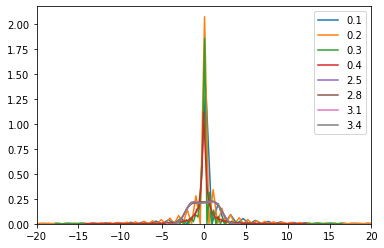

In [40]:
fig, ax = plt.subplots()

for key in ex_obs_dict.keys():
    obs = ex_obs_dict[key]
    obserr = obs - X_nature[:,::8]
    obserr = obserr.ravel()
    sns.kdeplot(obserr, label=key, ax=ax)
plt.xlim([-20, 20]);